<a href="https://colab.research.google.com/github/Chukhlib/may/blob/main/Lb_6%2C%D0%A7%D1%83%D1%85%D0%BB%D1%96%D0%B1_%D0%9A%D0%B0%D1%80%D0%B8%D0%BD%2C%D0%92%D0%B0%D1%80%D1%96%D0%BD%D1%82_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Інтерполяційний багаточлен Лагранжа

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand

In [ ]:
x=np.array([-2.,-1.,0.,1.], dtype=float)
y=np.array([-7.,4.,1.,2.], dtype=float)
x1, x2, x3, x4 = -3, -1.5, 0.5, 1.5 # точки, в якій потрібно обчислити значення

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
print("Значення функції у точці x_1 =", f1.round(4))

f2 = lagrange_interpolation(x, y, x2)
print("Значення функції у точці x_2 =", f2.round(4))

f3 = lagrange_interpolation(x, y, x3)
print("Значення функції у точці x_3 =", f3.round(4))

f4 = lagrange_interpolation(x, y, x4)
print("Значення функції у точці x_4 =", f4.round(4))


Значення функції у точці x_1 = -50.0
Значення функції у точці x_2 = 1.375
Значення функції у точці x_3 = -0.125
Значення функції у точці x_4 = 9.625


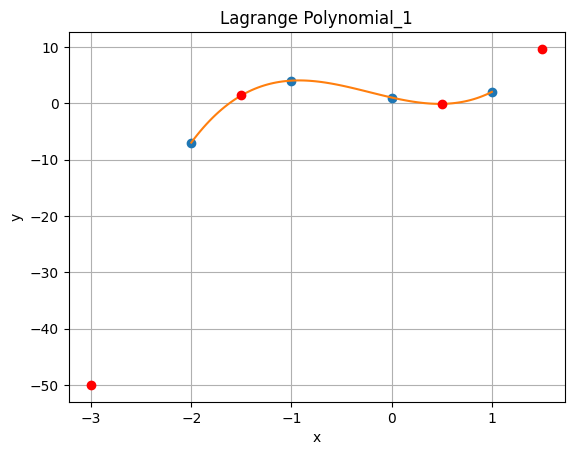

In [ ]:
xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа

plt.plot(x1,f1,'ro')
plt.plot(x2,f2,'ro')
plt.plot(x3,f3,'ro')
plt.plot(x4,f4,'ro')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

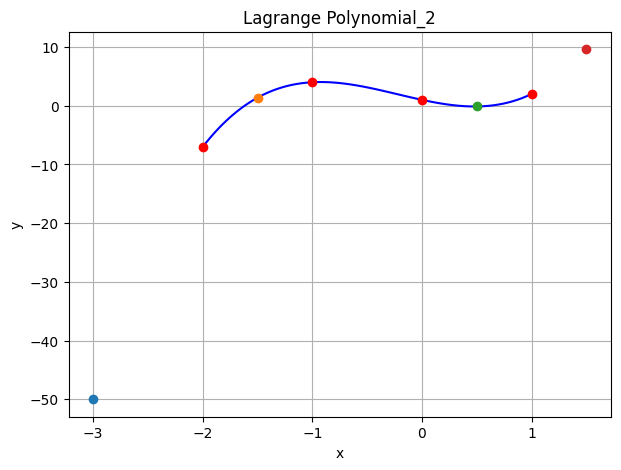

In [ ]:
from scipy.interpolate import lagrange

#Перевірка
f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial_2')

plt.plot(x1,f1,'o')
plt.plot(x2,f2,'o')
plt.plot(x3,f3,'o')
plt.plot(x4,f4,'o')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Приклад

In [ ]:
from scipy.interpolate import lagrange

# Таблиця значень функції
x = [     -3,     -1.5,       0.5,       1.5]
f = [ -2, -1, 0, 1, -7, 4, 1, 2]

d = len(x)

a = []
L = []
# Формуємо коефіцієнти та складові частини полінома
for j in range(d):
    p = 1
    s = ''
    for i in range(d):
        if i == j:
            continue
        else:
            p = p * (x[j] - x[i])
            s = s + '(x-' + str(x[i]) + ')'
    k = f[j]/p
    a.append(k)
    L.append(s)

# Формуємо поліном
polynom_string = 'L(x) = '
for i in range(d):
    polynom_string = polynom_string + str(a[i]) + '*' + L[i] + '+'
polynom_string = polynom_string[:-1].replace('+-', '-')

# Відображаємо поліном
print('Інтерполяційний поліном Лагранжа')
print(polynom_string)

Інтерполяційний поліном Лагранжа
L(x) = 0.08465608465608465*(x--1.5)(x-0.5)(x-1.5)-0.1111111111111111*(x--3)(x-0.5)(x-1.5)-0.0*(x--3)(x--1.5)(x-1.5)+0.07407407407407407*(x--3)(x--1.5)(x-0.5)


   3     2
3 x + 2 x - 4 x + 1


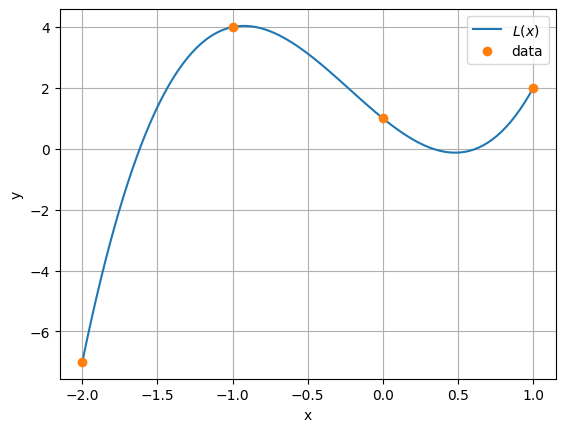

In [ ]:

# Таблиця значень функції
x = np.array([     -2,   -1,         0,       1])
y = np.array([-7, 4, 1, 2])
# Інтерполяційний поліном Лагранжа
p =lagrange(x, y)
print(p)

# Формуємо точки для відображення полінома
z = np.linspace(np.min(x), np.max(x), 100)

# Відображаємо поліном та задані точки
plt.plot(z,p(z),'-')
plt.plot(x,y,'o')
plt.legend(['$L(x)$','data'])
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y'); plt.show()